In [1]:
import matplotlib.pyplot as plt

import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dt.dt import Analysis_DT
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison

dotenv.load_dotenv(dotenv.find_dotenv())

True

In [2]:

HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)

pathTT = HOME_DIR + 'content/trained_models/task-trained/20240419_RandomTarget_NoisyGRU_Final/max_epochs=1500 latent_size=64 seed=0/'
an_TT = Analysis_TT(run_name = "TT", filepath = pathTT)


path_GRU_Sweep = pathTT + "20240424_Fig1_RandomTarget_GRU_RNN/"
subfolders_GRU = [f.path for f in os.scandir(path_GRU_Sweep) if f.is_dir()]

path_Vanilla_Sweep = pathTT + "20240419_Fig1_RandomTarget_Vanilla_Sweep/"
subfolders_Vanilla = [f.path for f in os.scandir(path_Vanilla_Sweep) if f.is_dir()]

path_NODE_Sweep = pathTT + "20240419_Fig1_RandomTarget_NODE_Sweep/"
subfolders_NODE = [f.path for f in os.scandir(path_NODE_Sweep) if f.is_dir()]

path_LFADS_Sweep = pathTT + "20240419_Fig1_RandomTarget_LFADS_Sweep/"
subfolders_LFADS = [f.path for f in os.scandir(path_LFADS_Sweep) if f.is_dir()]

/home/csverst/Github/CtDBenchmark/


In [3]:
comparison = Comparison(comparison_tag="Figure1RTR")
comparison.load_analysis(an_TT, reference_analysis=True, group = "TT")
# comparison.load_analysis(an_GRU, group = "GRU")
# comparison.load_analysis(an_Vanilla, group = "Vanilla")
# comparison.load_analysis(an_NODE, group = "NODE")
# comparison.load_analysis(an_LFADS, group = "LFADS")

for subfolder in subfolders_GRU:
    subfolder = subfolder + "/"
    analysis_temp = Analysis_DT(run_name = "GRU", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_temp, group = "GRU")

for subfolder in subfolders_Vanilla:
    
    subfolder = subfolder + "/"
    analysis_temp = Analysis_DT(run_name = "Vanilla", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_temp, group = "Vanilla")

for subfolder in subfolders_NODE:
    
    subfolder = subfolder + "/"
    analysis_temp = Analysis_DT(run_name = "NODE", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_temp, group = "NODE")

for subfolder in subfolders_LFADS:
        
        subfolder = subfolder + "/"
        analysis_temp = Analysis_DT(run_name = "LFADS", filepath = subfolder, model_type = "LFADS")
        comparison.load_analysis(analysis_temp, group = "LFADS")

comparison.regroup()

Working on 1 of 21: GRU
Group: GRU
Rate R2: 0.7825795208246411
State R2: 0.986528784847172
Working on 2 of 21: GRU
Group: GRU
Rate R2: 0.812180589651192
State R2: 0.9864476004502917
Working on 3 of 21: GRU
Group: GRU
Rate R2: 0.7855328767962245
State R2: 0.9861410327349185
Working on 4 of 21: GRU
Group: GRU
Rate R2: 0.7815076375052488
State R2: 0.9865642651384022
Working on 5 of 21: GRU
Group: GRU
Rate R2: 0.7915281562583439
State R2: 0.9865361798872204
Working on 6 of 21: LFADS
Group: LFADS
Rate R2: 0.9516838174184222
State R2: 0.9899771758291986
Working on 7 of 21: LFADS
Group: LFADS
Rate R2: 0.9513179827043703
State R2: 0.9898118281542684
Working on 8 of 21: LFADS
Group: LFADS
Rate R2: 0.9495331967228813
State R2: 0.9897180393928758
Working on 9 of 21: LFADS
Group: LFADS
Rate R2: 0.9514728185785709
State R2: 0.9899262221014308
Working on 10 of 21: LFADS
Group: LFADS
Rate R2: 0.9496555817562133
State R2: 0.9897666702182785
Working on 11 of 21: NODE
Group: NODE
Rate R2: 0.930068514128

array([[0.78257952, 0.98652878],
       [0.81218059, 0.9864476 ],
       [0.78553288, 0.98614103],
       [0.78150764, 0.98656427],
       [0.79152816, 0.98653618],
       [0.95168382, 0.98997718],
       [0.95131798, 0.98981183],
       [0.9495332 , 0.98971804],
       [0.95147282, 0.98992622],
       [0.94965558, 0.98976667],
       [0.93006851, 0.98058709],
       [0.92961059, 0.98090767],
       [0.92846885, 0.98116625],
       [0.92797232, 0.980182  ],
       [0.93046667, 0.980644  ],
       [0.        , 0.        ],
       [0.68681483, 0.98391335],
       [0.6815424 , 0.9837942 ],
       [0.67339332, 0.9840507 ],
       [0.65072183, 0.9842483 ],
       [0.67160544, 0.9836759 ]])

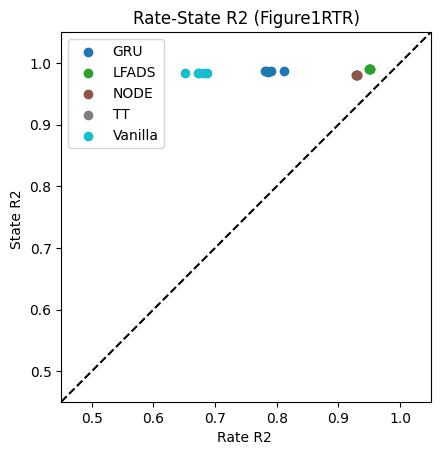

In [4]:
# comparison.compare_performance()
# comparison.compare_CCA(num_components=5)
comparison.compare_state_rate_r2(save_pdf=True)

['GRU' 'GRU' 'GRU' 'GRU' 'GRU' 'LFADS' 'LFADS' 'LFADS' 'LFADS' 'LFADS'
 'NODE' 'NODE' 'NODE' 'NODE' 'NODE' 'TT' 'Vanilla' 'Vanilla' 'Vanilla'
 'Vanilla' 'Vanilla']
(60000, 50)
(60000, 50)
[ 0.45481065  0.95073736  0.89851583  0.95146303  0.6792437   0.69627702
  0.70948443  0.28177274  0.87133967  0.79606028  0.985237    0.6733159
  0.18032613  0.2455056   0.83196355  0.99222971  0.97365423  0.842508
  0.98237357  0.91527471  0.58861679  0.91592975  0.8925358   0.9144035
  0.98999653  0.98385598  0.88487885  0.89602842  0.77080196  0.96971638
  0.6764787   0.89495569  0.94749724  0.7850186   0.74527611  0.96749489
  0.93664901  0.9575263   0.9560028   0.87081344  0.86137772  0.89751352
  0.91823447 -0.86644074  0.92652939  0.63297204  0.95420527  0.93127512
  0.68673698  0.95248889]


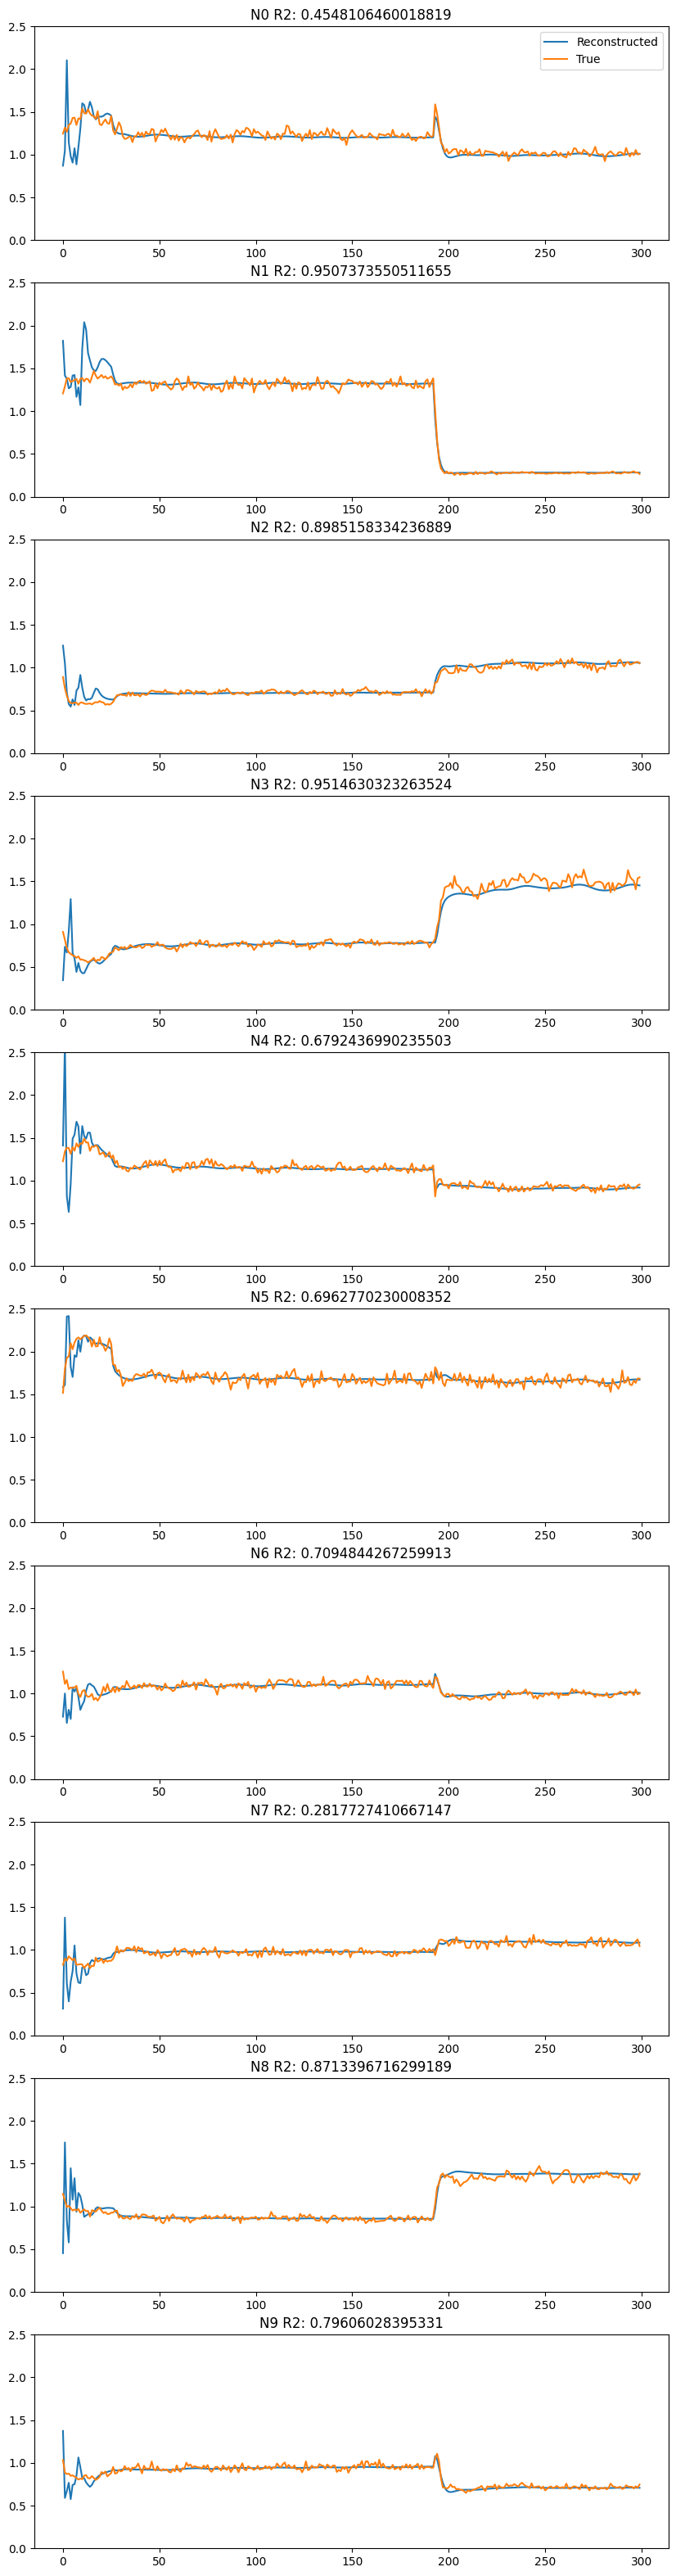

In [5]:
# sims = comparison.compare_dynamics_DSA()

import torch
phase= "val"
print(comparison.groups)
analysis_ind = 2
rates, latents = comparison.analyses[analysis_ind].get_model_outputs(phase=phase)
true_rates = comparison.analyses[analysis_ind].get_true_rates(phase=phase)

from sklearn.metrics import r2_score
tr_np = true_rates.detach().cpu().numpy()
rates_np = rates.detach().cpu().numpy()
tr_np = tr_np.reshape(-1, tr_np.shape[-1])
rates_np = rates_np.reshape(-1, rates_np.shape[-1])
print(tr_np.shape)
print(rates_np.shape)
r2 = r2_score(tr_np, rates_np, multioutput='raw_values')
print(r2)

trial_num= 2
rates_0 = rates[trial_num,:,:].detach().numpy()
latents_0 = latents[trial_num,:,:].detach().numpy()
true_rate_0 = true_rates[trial_num,:,:].detach().numpy()

neurons_to_plot= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
fig = plt.figure(figsize=( 10,4*len(neurons_to_plot),))

axes = fig.subplots(len(neurons_to_plot))
for i, ax in enumerate(axes):
    ax.plot(rates_0[:, neurons_to_plot[i]], label="Reconstructed")
    ax.plot(true_rate_0[:, neurons_to_plot[i]], label="True")
    ax.set_title(f"N{neurons_to_plot[i]} R2: {r2[neurons_to_plot[i]]}")
    ax.set_ylim([0,2.5])
    if i ==0:
        ax.legend()

['GRU' 'GRU' 'GRU' 'GRU' 'GRU' 'LFADS' 'LFADS' 'LFADS' 'LFADS' 'LFADS'
 'NODE' 'NODE' 'NODE' 'NODE' 'NODE' 'TT' 'Vanilla' 'Vanilla' 'Vanilla'
 'Vanilla' 'Vanilla']
(60000, 50)
(60000, 50)
[ 0.37208082  0.9564737   0.91057137  0.96204998  0.71520559  0.75427779
  0.70844653  0.46918831  0.88535828  0.82934721  0.98708694  0.71066634
  0.43480298  0.28482711  0.80703429  0.99369396  0.9680921   0.89344921
  0.98214767  0.90627806  0.66833974  0.93030215  0.88935732  0.89380426
  0.9902574   0.98484268  0.88555143  0.90472603  0.81309454  0.97291055
  0.68301771  0.91245481  0.94578468  0.82940093  0.75650551  0.96672174
  0.95534024  0.95810243  0.95996448  0.89946851  0.90488354  0.92676337
  0.90565345 -0.48124968  0.92884491  0.70575457  0.95575633  0.92141671
  0.74929664  0.95045183]


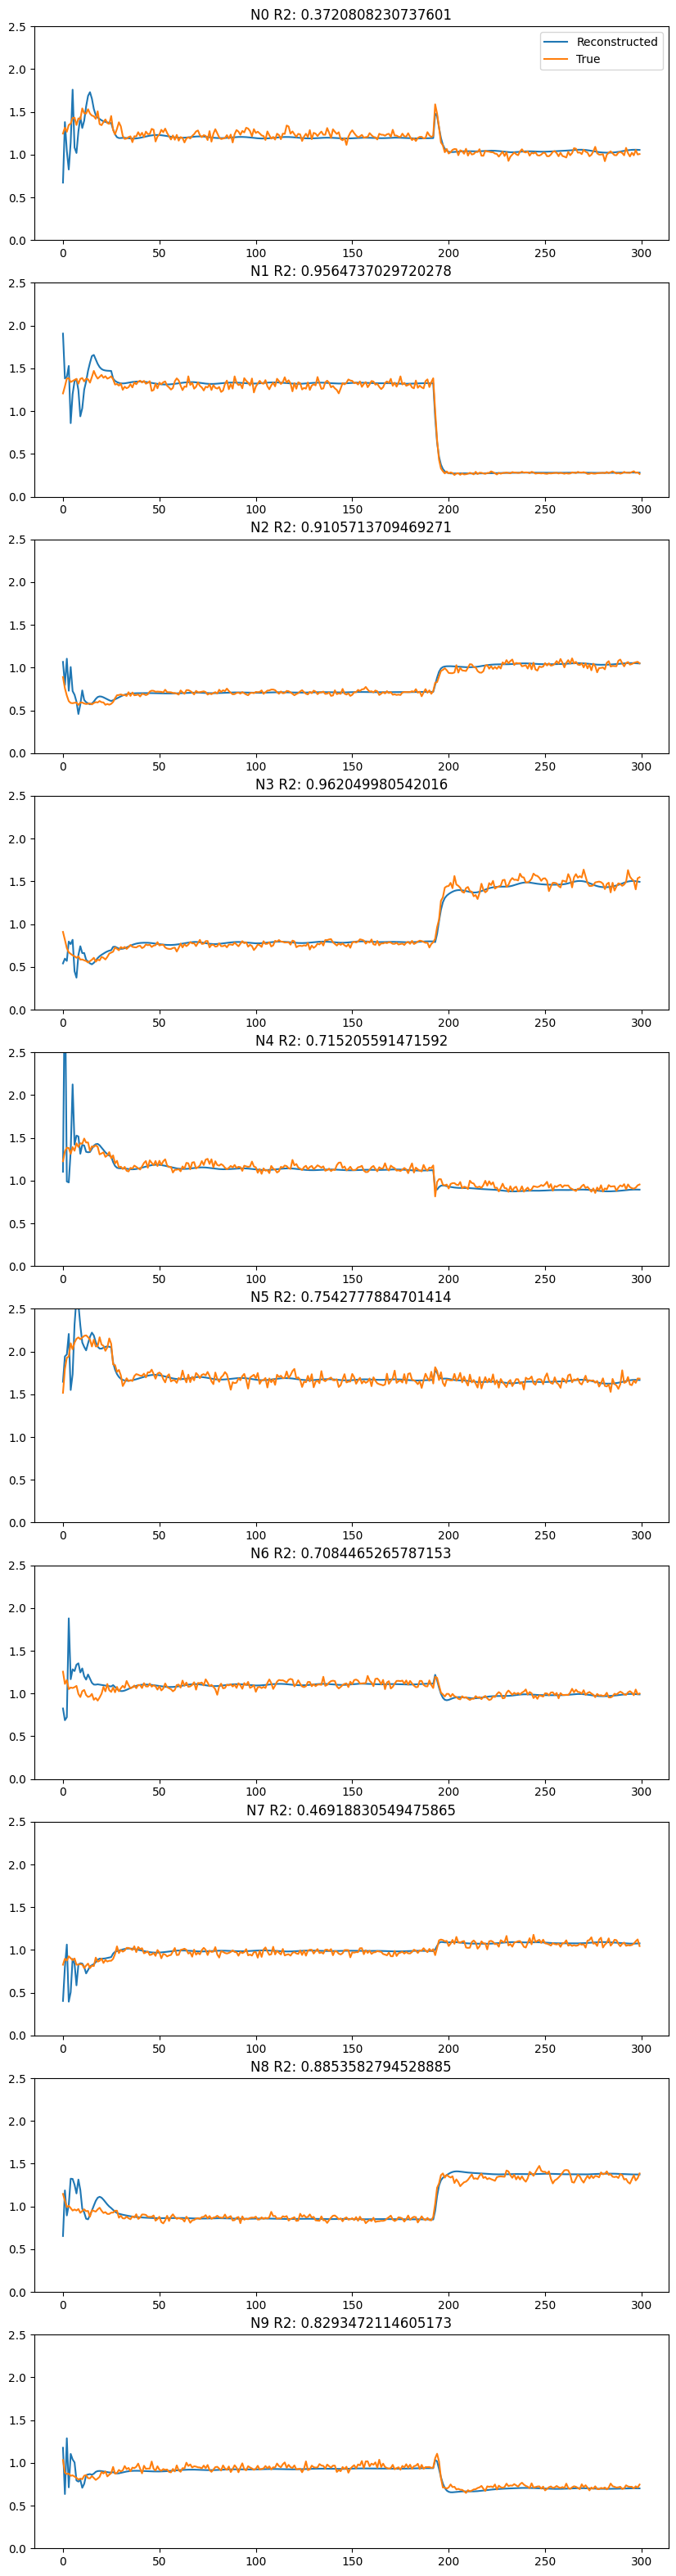

In [6]:
phase= "val"
print(comparison.groups)
rates, latents = comparison.analyses[1].get_model_outputs(phase=phase)
true_rates = comparison.analyses[1].get_true_rates(phase=phase)

from sklearn.metrics import r2_score
tr_np = true_rates.detach().cpu().numpy()
rates_np = rates.detach().cpu().numpy()
tr_np = tr_np.reshape(-1, tr_np.shape[-1])
rates_np = rates_np.reshape(-1, rates_np.shape[-1])
print(tr_np.shape)
print(rates_np.shape)
r2 = r2_score(tr_np, rates_np, multioutput='raw_values')
print(r2)

trial_num= 2
rates_0 = rates[trial_num,:,:].detach().numpy()
latents_0 = latents[trial_num,:,:].detach().numpy()
true_rate_0 = true_rates[trial_num,:,:].detach().numpy()

neurons_to_plot= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
fig = plt.figure(figsize=( 10,4*len(neurons_to_plot),))
axes = fig.subplots(len(neurons_to_plot))
for i, ax in enumerate(axes):
    ax.plot(rates_0[:, neurons_to_plot[i]], label="Reconstructed")
    ax.plot(true_rate_0[:, neurons_to_plot[i]], label="True")
    ax.set_title(f"N{neurons_to_plot[i]} R2: {r2[neurons_to_plot[i]]}") 
    
    ax.set_ylim([0,2.5])
    if i ==0:
        ax.legend()

['GRU' 'GRU' 'GRU' 'GRU' 'GRU' 'LFADS' 'LFADS' 'LFADS' 'LFADS' 'LFADS'
 'NODE' 'NODE' 'NODE' 'NODE' 'NODE' 'TT' 'Vanilla' 'Vanilla' 'Vanilla'
 'Vanilla' 'Vanilla']
(60000, 50)
(60000, 50)
[0.87166209 0.98987775 0.96693746 0.98511572 0.92865495 0.92441253
 0.92352488 0.82022952 0.95533861 0.96531237 0.99037028 0.89222852
 0.84825798 0.83703057 0.95066926 0.99393391 0.98484199 0.98140669
 0.98949768 0.97386185 0.93543723 0.97087263 0.98451736 0.96790695
 0.99333886 0.99095934 0.98277846 0.97709966 0.94847446 0.98471043
 0.92074189 0.97431246 0.98632469 0.94548656 0.94000983 0.98230588
 0.98089238 0.98414886 0.99163332 0.9747484  0.96191649 0.97633019
 0.97658862 0.64229948 0.97820467 0.89606128 0.98753976 0.98898401
 0.9109262  0.97398931]


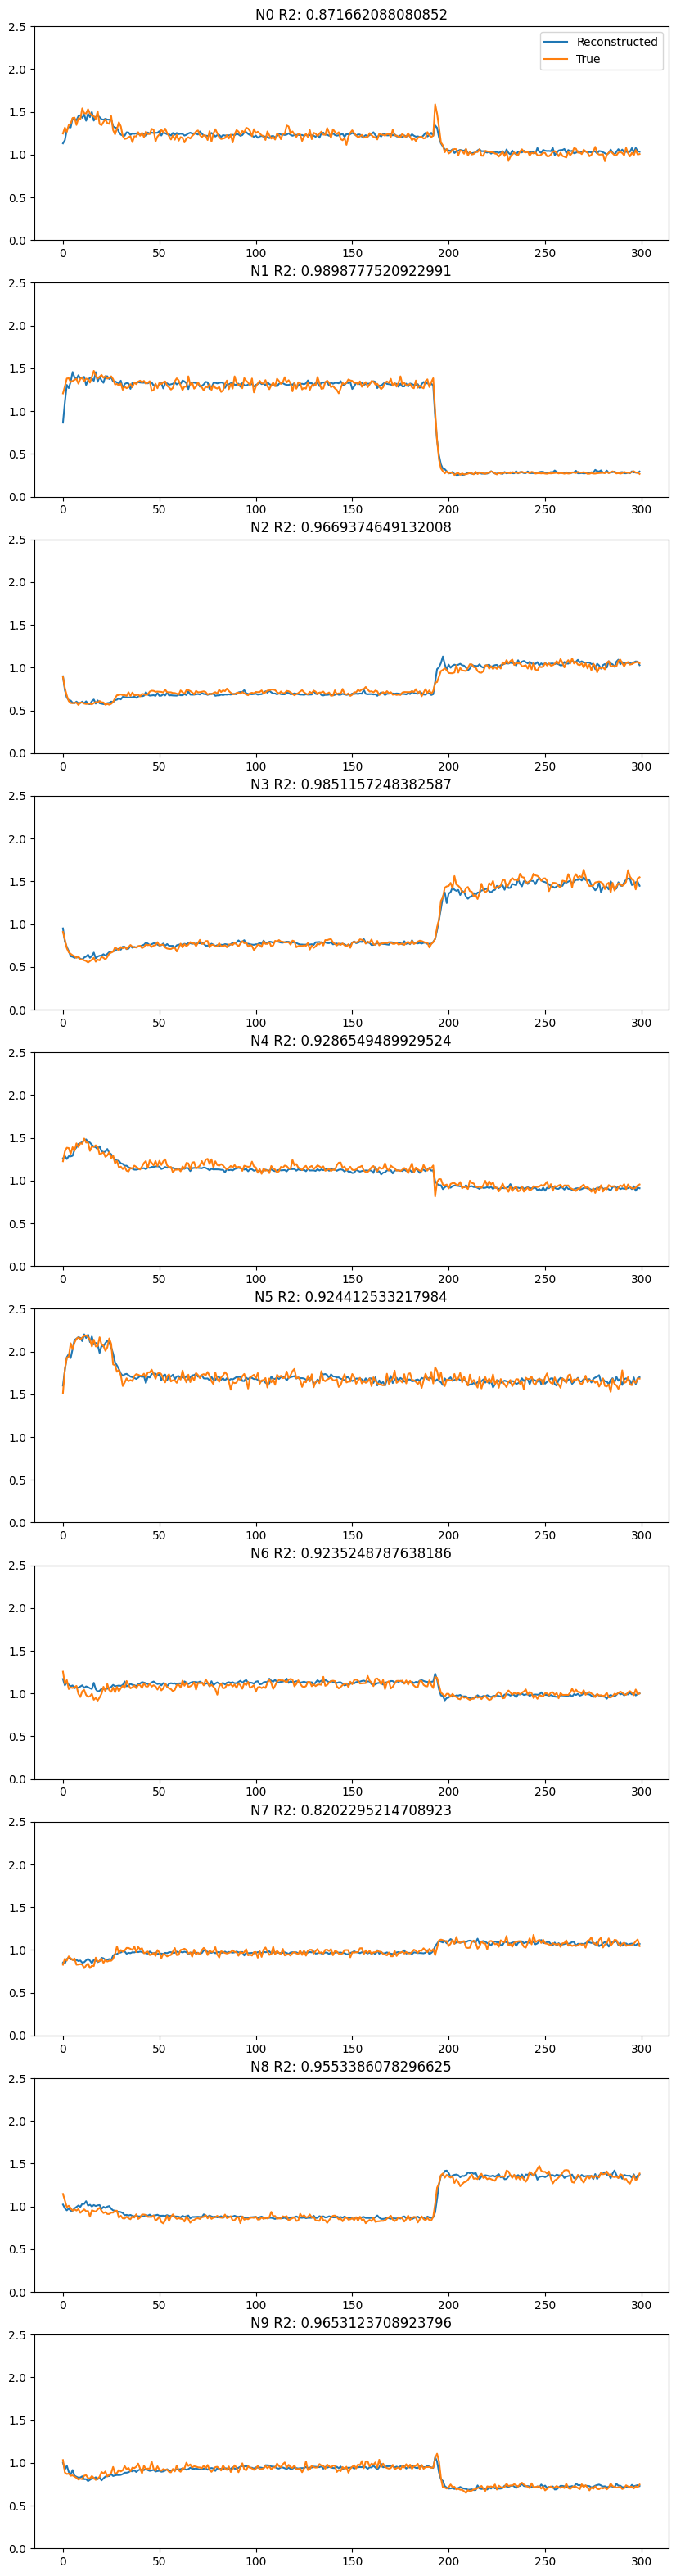

In [7]:
phase= "val"
print(comparison.groups)
analysis_num = 9
rates, latents = comparison.analyses[analysis_num].get_model_outputs(phase=phase)
true_rates = comparison.analyses[analysis_num].get_true_rates(phase=phase)

from sklearn.metrics import r2_score
tr_np = true_rates.detach().cpu().numpy()
rates_np = rates.detach().cpu().numpy()
tr_np = tr_np.reshape(-1, tr_np.shape[-1])
rates_np = rates_np.reshape(-1, rates_np.shape[-1])
print(tr_np.shape)
print(rates_np.shape)
r2 = r2_score(tr_np, rates_np, multioutput='raw_values')
print(r2)

trial_num= 2
rates_0 = rates[trial_num,:,:].detach().numpy()
latents_0 = latents[trial_num,:,:].detach().numpy()
true_rate_0 = true_rates[trial_num,:,:].detach().numpy()

neurons_to_plot= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
fig = plt.figure(figsize=( 10,4*len(neurons_to_plot),))
axes = fig.subplots(len(neurons_to_plot))
for i, ax in enumerate(axes):
    ax.plot(rates_0[:, neurons_to_plot[i]], label="Reconstructed")
    ax.plot(true_rate_0[:, neurons_to_plot[i]], label="True")
    ax.set_title(f"N{neurons_to_plot[i]} R2: {r2[neurons_to_plot[i]]}") 
    
    ax.set_ylim([0,2.5])
    if i ==0:
        ax.legend()

comparison.compare_to_reference_affine